# <p style="text-align: center;">MIS 382N: Advanced Machine Learning</p>
# <p style="text-align: center;">Homework 3</p>
## <p style="text-align: center;">Total points: 85</p>
## <p style="text-align: center;">Due: Monday, **Oct 18th** submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. Please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting (%matplotlib inline). 

**Note: Notebooks MUST have the images embedded in them. There will be no regrades if attached images do not render in the notebook. Please re download from canvas after submission and make sure all attached images render without errors. (Hint: Image module from IPython.display)**

**This can be an individual assignment or group of 2. If you choose to do it as a group, please specify who you are working with (name and EID), then only one student should submit the homework. Put your name and eid here.**

Name: Akshat Johari

EID: aj32864

Name: Yashpreet Kaur

EID: yk8742

# Question 1: Stochastic gradient descent II (20 pts)

Write an SGD solution in Python to the non-linear model without using any other library except for those provided in the code template below. 

$$ y = w_0 + w_1x_1 + w_2x_1x_2 + w_3x_1^2x_2 + w_4x_1x_2^2 + w_5x_2^3$$ 

The solution class template is given. The `init()` function of the class takes as input the `learning_rate`, `regularization_constant` and `number_of_epochs`. The `fit()` method must take as input `X`, `y` and `update_rule` which can be `'sgd_momentum'` or `'RMSprop'`. The `predict()` method takes an `X` value (optionally, an array of values). 

Use your new gradient descent regression to train your model and predict the data given in 'SGD_samples.csv', for 30 epochs, using learning rates: `[0.0001, 0.001, 0.01, 0.05]` and regularization (ridge regression) constants: `[0, 0.01, 0.1]`. **(8 points)** 

Plot MSE and the $w$ parameters as a function of epoch (for 30 epochs) for the best 2 combinations of `learning_rate` and `regularization_constant` for SGD-Momentum, RMSprop, i.e., for each combination, you should have one plot for MSE vs Epoch and another for the parameters(weights) vs Epoch using respectively SGD-Momentum and RMSprop, hence in total 8 plots. Report the `learning_rate`, `regularization_constant` and MSE at the end of 30 epochs for the two best combinations for SGD-Momentum and RMSprop respectively. **($4\times 2 = 8$ pts)**

Observe the results, compare the performance of the two learning methods **(4 pts)**. 

Here is a blog which you can go through to know about RMSprop and Adam - [blog](http://ruder.io/optimizing-gradient-descent/).

Following codes are for your reference, please don't change the initialization values of the given parameters.


$$ MSE = (t - y) ^ 2 $$

$$ y = w_0 + w_1x_1 + w_2x_1x_2 + w_3x_1^2x_2 + w_4x_1x_2^2 + w_5x_2^3 $$

$$ \frac{\partial MSE}{\partial w_n} = -2y \frac{\partial y}{\partial w_n}$$

$$ \frac{\partial y}{\partial w_0} = 1 $$
$$ \frac{\partial y}{\partial w_1} = x_1 $$
$$ \frac{\partial y}{\partial w_2} = x_1 x_2 $$
$$ \frac{\partial y}{\partial w_3} = x_1 ^2 x_2 $$
$$ \frac{\partial y}{\partial w_4} = x_1 x_2 ^2 $$
$$ \frac{\partial y}{\partial w_5} = x_2 ^3 $$


For momentum:

$$ v_t = \gamma v_{t-1} + \eta \nabla_\theta J (\theta) $$
$$ \theta = \theta - v_t $$


For RMSProp:

$$ E[g^2]_t=0.9E[g^2]_{t−1} +0.1g^2_t $$

$$ \theta_{t+1} = \theta_t − \frac{\eta}{√E[g^2]_t + \epsilon} g_t $$

In [131]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

num_of_coefs = 6

class LinearRegression:
    
    def __init__(self, learning_rate, regularization, n_epoch):
        self.learning_rate = learning_rate
        self.n_epoch = n_epoch
        self.regularization = regularization
        self.eps = 10**-8
        self.coef = np.zeros(num_of_coefs) # coefficient vector
        self.cache = np.zeros(self.coef.shape) # used only for rmsprop
        self.gamma = 0.9 # used only for rmsprop
        self.mu = 0.9 # used in momentum
        self.v = np.zeros(self.coef.shape) # Used in momentum

    def rmsprop(self, gradient):
        '''
        updates self.coef based on gradient using rmsprop
        '''
        self.cache = self.gamma * self.cache + (1-self.gamma) * gradient**2 
        self.coef = self.coef - self.learning_rate * gradient / (self.cache + self.eps)**0.5
        
    def sgd_momentum(self, gradient):
        '''
        updates self.coef based on gradient using Sgd_momentum
        '''
        self.v = self.v * self.mu + self.learning_rate * gradient 
        self.coef = self.coef - self.v
    
    def fit(self, X, y, update_rule='sgd_momentum', plot=False):
        '''
        Fit the model given X, y. It uses the specified update_rule
        and displays a plot of the coefficients vs epochs, and mse vs epochs if plot is set as True. 
        
        -> use get_features to get the features from X
        -> for epoch in epochs:
            iterate through all x, y.
                compute prediction using linearPredict.
                compute gradient.
                pass this gradient to the corresponding update function and update the coefficients
                keep track of mse and coefficients
        -> plot if required
        
        '''
        mse = []
        coefs = []
        X = self.get_features(X)
        for epoch in range(self.n_epoch):
            for i in range(X.shape[0]):
                xi = X[i,:]
                error = self.linearPredict(xi) - y[i]
                c = 2 * error
                gradient = np.array([c * xi[a] + 2 * self.regularization * self.coef[a] for a in range(num_of_coefs)])
                if update_rule == 'sgd_momentum':
                    self.sgd_momentum(gradient)
                else:
                    self.rmsprop(gradient)
            coefs.append(self.coef)
            residuals = y - self.linearPredict(X)         
            mse.append(np.mean(residuals**2))
        
        if plot == True:
            if update_rule == 'sgd_momentum':
                x = 'SGD Momentum'
            else:
                x = 'RMS Prop'
            plt.figure(figsize = [15,6])
            plt.subplot(1,2,1)
            plt.plot(range(self.n_epoch),mse)
            plt.xlabel('Epoch')
            plt.ylabel('MSE')
            plt.title(x + '\nMSE vs Epoch')
            plt.subplot(1,2,2)
            coefs = np.array(coefs)
            plt.plot(range(self.n_epoch),coefs[:,0],label='w0')
            plt.plot(range(self.n_epoch),coefs[:,1],label='w1')
            plt.plot(range(self.n_epoch),coefs[:,2],label='w2')
            plt.plot(range(self.n_epoch),coefs[:,3],label='w3')
            plt.plot(range(self.n_epoch),coefs[:,4],label='w4')
            plt.plot(range(self.n_epoch),coefs[:,5],label='w5')
            plt.legend(loc = 'best')
            plt.xlabel('Epoch')
            plt.ylabel('Parameter Value')
            plt.title(x + '\nWeights vs Epoch')
            plt.tight_layout()
        
        self.lowest_mse = mse[-1]
                
    def get_features(self, X):
        x = np.zeros((X.shape[0], num_of_coefs))
        x[:,0] = 1
        x[:,1] = X[:,0]
        x[:,2] = X[:,0]*X[:,1]
        x[:,3] = (X[:,0]**2)*X[:,1]
        x[:,4] = X[:,0] * (X[:,1]**2)
        x[:,5] = X[:,1]**3
        return x
        
    def linearPredict(self, X_features):
        '''
        returns the dot product of X and self.coef
        '''    
        return X_features.dot(self.coef)

In [97]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('SGD_samples.csv')
X = np.array([data['x1'].values, data['x2'].values]).T
y = data['y'].values
n_epochs = 30
learning_rate = [0.0001, 0.001, 0.01, 0.05]
regularization = [0, 0.01, 0.1]

In [119]:
import warnings
warnings.filterwarnings('ignore')

rates = []
for i in regularization:
    for j in learning_rate:
        rates.append([i,j])

mses_rms = []
mses_mom = []


for i in range(len(rates)):
    var1 = LinearRegression(rates[i][1], rates[i][0], n_epochs)
    var1.fit(X,y,'sgd_momentum',False)
    mses_mom.append(var1.lowest_mse)
    
    var2 = LinearRegression(rates[i][1], rates[i][0], n_epochs)
    var2.fit(X,y,'rmsprop', False)
    mses_rms.append(var2.lowest_mse)

RMS Prop
Best Learning Rate for 1 : 0.001
Best Regularization Rate for 1 : 0
MSE: 0.020202855335249133
Best Learning Rate for 2 : 0.001
Best Regularization Rate for 2 : 0.01
MSE: 0.020331638749269285
--------------------------------------------------
Momentum
Best Learning Rate 1 : 0.0001
Best Regularization Rate 1 : 0
MSE: 0.020338107645762996
Best Learning Rate 2 : 0.001
Best Regularization Rate 2 : 0
MSE: 0.020350898792292647


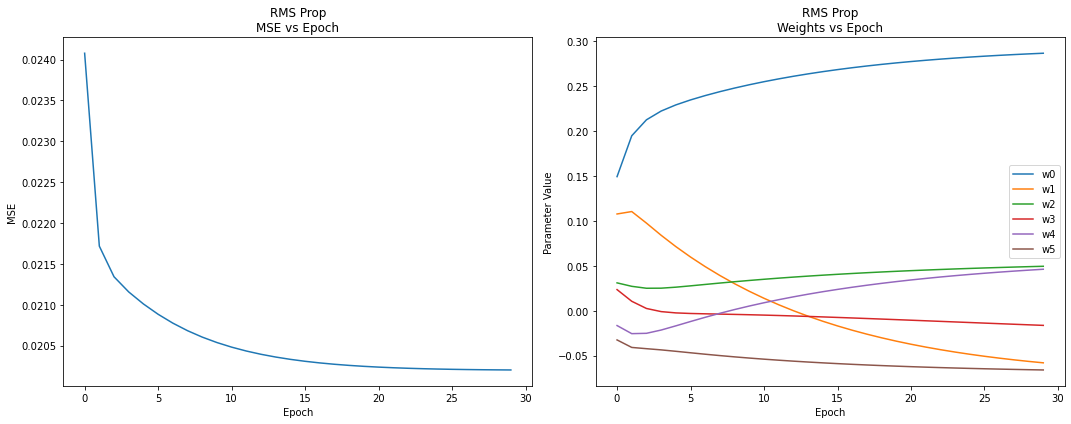

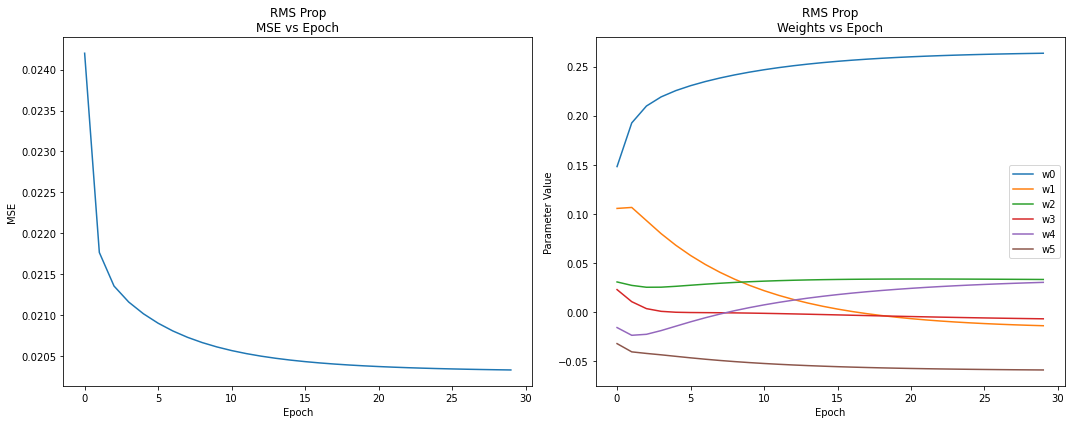

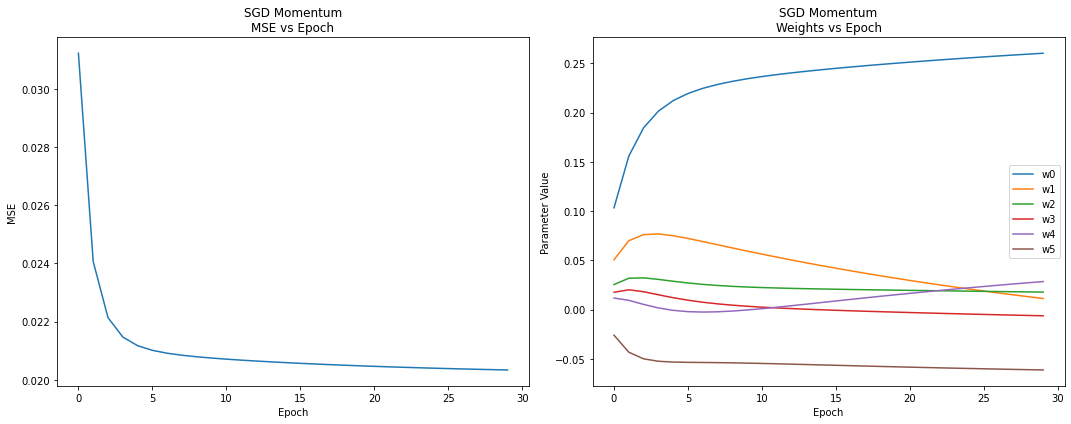

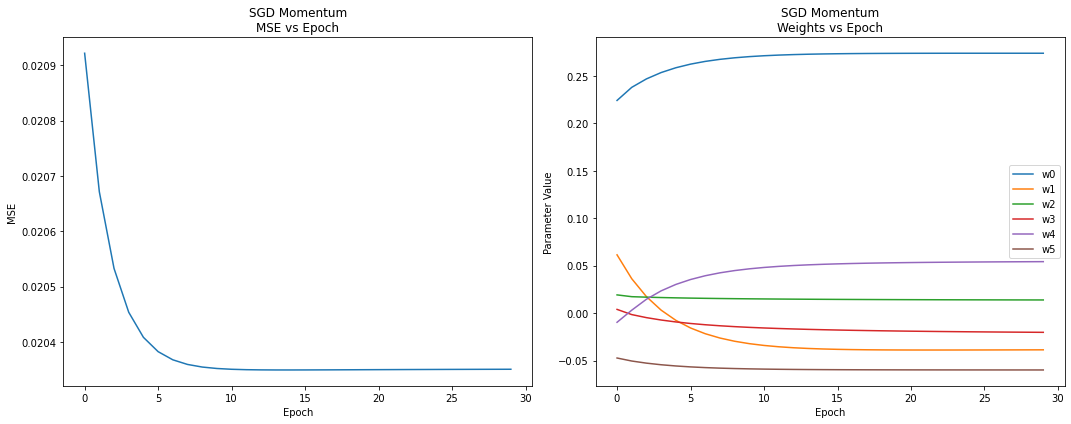

In [132]:
ids_mom = list(np.argsort(np.array(mses_mom))[:2])
ids_rms = list(np.argsort(np.array(mses_rms))[:2])

print('\033[1m' + 'RMS Prop' + '\033[0m')
for i,j in enumerate(ids_rms):
    print('Best Learning Rate for', str(i+1), ':', rates[j][1])
    print('Best Regularization Rate for', str(i+1), ':', rates[j][0])
    obj = LinearRegression(rates[j][1], rates[j][0], n_epochs)
    obj.fit(X,y,'rms', plot = True)
    print("MSE:", obj.lowest_mse)

print('-'*50)
print('\033[1m' + 'Momentum' + '\033[0m')
for i,j in enumerate(ids_mom):
    print('Best Learning Rate', str(i+1), ':', rates[j][1])
    print('Best Regularization Rate', str(i+1), ':', rates[j][0])
    obj = LinearRegression(rates[j][1], rates[j][0], n_epochs)
    obj.fit(X,y,plot = True)
    print("MSE:", obj.lowest_mse)

# Answer:

# Question 2: Tensorflow Playground (15 pts)

In this question, you will be playing with [Tensorflow Playground](https://playground.tensorflow.org).

Select "**Classification**" as the **Problem Type**. Among the four datasets shown in DATA, please select the **top right** dataset. 

Use the following settings as the DEFAULT settings for all **subquestions**: Learning rate = 0.03, Activation = Tanh, Regularization = None, Ratio of training to test data = 50%, Noise = 0, Batch Size = 30, input as $X_1$ with $X_2$, One hidden layer with two neurons.

a) **(4 pts)** Use the DEFAULT setting and run two experiments - one using **Tanh** as the activation function and one using the **Linear** activation function. Report the train, test losses for both at the end of **1000 epochs**. What qualitative difference do you observe in the decision boundaries obtained? What do you think is the reason for this? 

We will now study the effect of certain variations in the network structure or training process, keeping all other aspects the same as in the DEFAULT setting specified above, with **Tanh** as the activation.

b) **(4 pts)** Effect of number of hidden units: Keep other settings the same as in DEFAULT, report the training loss and test loss at the end of 1000 epochs **using 4 neurons and 8 neurons in the hidden layer**. What do you observe in terms of the decision boundary obtained as the number of neurons increases? What do you think is the reason for this? 

c) **(4 pts)** Effect of Learning rate and number of epochs: Keep other settings the same as in DEFAULT, change the Activation to **ReLU** and use **4 neurons** in the hidden layer. For learning rate 10, 1, 0.1, 0.01 and 0.001, report the train, test losses at the end of **100 epochs**, **1000 epochs** respectively. What do you observe from the change of loss vs learning rate, and the change of loss vs epoch numbers? 

d) **(3 pts)** Use the DEFAULT setting. Play around with any hyperparameters, network architectures or input features (such as $\sin(X_1), X_1^2$ etc.), and report the best train and test loss you obtain (test loss should be no greater than 0.06). Attach the screenshot showing your full network, output and the parameters. Briefly justify your results, and comment on what helps/what doesn't help with lowering the loss, etc. 

# Answer:

#### Part a 
Using Tanh activation function:  
Train loss at the end of 1000 epochs: 0.180  
Test loss at the end of 1000 epochs: 0.236 

Using linear function:  
Train loss at the end of 1000 epochs: 0.498  
Test loss at the end of 1000 epochs: 0.503  

The reason that the linear model performs worse is that using it is equivalent to using a linear transformation; neural networks require non-linear transformations. The data is spread into what is essentially four quadrants. The tanh activation function allows the neural network to select the data from opposite quadrants, whereas the linear model can never do better than a 50% accuarcy in classification.   

This is why the decision boundaries are different - the linear model predicts one or the other, and since the data is nearly equally distributed, the error is 50%. The tanh function boundary can be described as a wide diagonal - it tries to capture as many data points in opposite quadrants as possible.


#### Part b

Using 4 neurons in the hidden layer:  
Train loss at the end of 1000 epochs: 0.088  
Test loss at the end of 1000 epochs:0.178  

Using 8 neurons in the hidden layer:  
Train loss at the end of 1000 epochs: 0.005  
Test loss at the end of 1000 epochs: 0.015  

The decision boundary in both these cases is somewhat hourglass-shaped. The 8 neuron model performs better than the 4 neuron model.   


#### Part c   
<br></br>

<center> Training Data </center>  

| Epochs |  | Learning | Rate |  |  |
| --- | --- | --- | --- | --- | --- |
|  | 10 | 1 | 0.1 | 0.01 | 0.001 |
| 100 | 0.610 | 0.249 | 0.004 | 0.183 | 0.479 |
| 1000 | 0.610 | 0.248 | 0.000 | 0.011 | 0.069 |  
  
<br> </br>
   

<center> Test Data </center>  

| Epochs |  | Learning | Rate |  |  |
| --- | --- | --- | --- | --- | --- |
|  | 10 | 1 | 0.1 | 0.01 | 0.001 |
| 100 | 0.600 | 0.260 | 0.004 | 0.199 | 0.476 |
| 1000 | 0.600 | 0.257 | 0.000 | 0.020 | 0.073 |   

<br></br>

Reducing learning rate from 10 to 0.1 has the effect of consistently reducing error, and reducing it further begins increasing it (although very slightly).  


Using 100 vs 1000 epochs has a significant impact on the error when the learning rate is small - this makes sense, since we are taking smaller steps each time to reach the minima. We will require time. In the case of a large learning rate, number of epochs seems inconsequential - the error is unaffected for the most part.  

#### Part d

Ran the ReLU function with 4 neurons in 1 hidden layer, and 1000 epochs. Input was $ x_1, x_2, x^2 _1. $ Train error = 0.027, test error = 0.032  




# Question 3: Outlier detection using PyOD (30 pts)

Oulier detection, or anomaly detection is usually an unsupervised learning task where the objective is to identify suspicious observations in data. It has been widely used in military surveillance for enemy activities to prevent attacks, intrusion detection in cyber security, fraud detection for credit cards, etc.

PyOD is a comprehensive and scalable Python library for detecting outlying objects in multivariate data. PyOD includes more than 30 detection algorithms and provides unified APIs which makes it quite handy to use. In this question, you will play with PyOD, explore three different outlier detection algorithms and compare their performances. First let's install PyOD.

```
# install pyod using pip first
!pip install pyod
```

You can load the data stored in 'Q3_train_dataset.csv' and 'Q3_test_dataset.csv' using the following codes.

```
import pandas as pd
# Load data code goes here
train_df = pd.read_csv('Q3_train_dataset.csv')
test_df = pd.read_csv('Q3_test_dataset.csv')

X_train = train_df[['X_train_0', 'X_train_1', 'X_train_2', 'X_train_3', 'X_train_4']].to_numpy()
y_train = train_df[['y_train']].to_numpy()
X_test = test_df[['X_test_0', 'X_test_1', 'X_test_2', 'X_test_3', 'X_test_4']].to_numpy()
y_test = test_df[['y_test']].to_numpy()
```

 `X_train` and `X_test` contain the features, with the dimension of 5. `y_train` and `y_test` store the outlier labels, 0 means normal data, 1 means outlier data. 
 
a) **(5 pts)** **Fit `X_train` to a linear outlier detection model Minimum Covariance Determinant (MCD) using PyOD**, this [page](https://pyod.readthedocs.io/en/latest/pyod.models.html#module-pyod.models.mcd) will provide some functions you may need. 

```
from pyod.models.mcd import MCD
clf = MCD() # initialize MCD class using the default parameters

# YOUR CODE SHOULD COME HERE, FIT THE MODEL USING X_TRAIN
```
**Use the fitted model to predict the outlier labels of `X_test`. Compute the raw outlier scores on `X_test` using `decision_function()`.**

**Run PyOD's `evaluate_print()` function using the test set ground truth outlier labels and the raw outlier scores predicted by the model, to compute the ROC and Precision@n results .** 

```
from pyod.utils.data import evaluate_print
```

b) **(5 pts)** `X_train` and `X_test` are 5-dimension features, which makes it impossible to visualize them in Euclidean plane. But we can use Principal Component Analysis (PCA) to reduce the dimensions of `X_train` and `X_test` to 2, and then plot them. You may want to use `fit_and_transform()` function.


```
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

# Fit pca to X_train and X_test and transform 
train_principalComponents = # IMPLEMENT
test_principalComponents = # IMPLEMENT
```

After reducing the dimension to 2, now you can visualize the outliers using PyOD's `visualize()` function. Please plot the visualization. You may find [this](https://pyod.readthedocs.io/en/latest/pyod.utils.html#module-pyod.utils.example) useful on how to use `visualize()` .

```
from pyod.utils.example import visualize
```

Now you should be able to observe the ground truth outliers and the outliers predicted by the model.


c) **(20 pts)** Apply the same process as in (a) and (b) to the following two models, and visualize the outlier results. Please compare the performance of the three models in terms of their ROC, Precision@n, and what you observe from the three visualizations.

*   [Proximity-Based model - Clustering Based Local Outlier Factor (CBLOF)](https://pyod.readthedocs.io/en/latest/pyod.models.html#module-pyod.models.cblof)
*   [Probabilistic model - Copula-based Outlier Detection (COPOD)](https://pyod.readthedocs.io/en/latest/pyod.models.html#module-pyod.models.copod)

```
from pyod.models.cblof import CBLOF
from pyod.models.copod import COPOD
```

# Answer:

In [134]:
# install pyod using pip first
# !pip install pyod

In [135]:
import pandas as pd
# Load data code goes here
train_df = pd.read_csv('Q3_train_dataset.csv')
test_df = pd.read_csv('Q3_test_dataset.csv')

X_train = train_df[['X_train_0', 'X_train_1', 'X_train_2', 'X_train_3', 'X_train_4']].to_numpy()
y_train = train_df[['y_train']].to_numpy()
X_test = test_df[['X_test_0', 'X_test_1', 'X_test_2', 'X_test_3', 'X_test_4']].to_numpy()
y_test = test_df[['y_test']].to_numpy()

In [188]:
# (a)
from pyod.models.mcd import MCD
clf = MCD() # initialize MCD class using the default parameters

# fit the model using X_train

# YOUR CODE SHOULD COME HERE

clf.fit(X_train)
y_train_pred = clf.labels_
y_train_scores = clf.decision_scores_

y_test_pred = clf.predict(X_test)
y_test_scores = clf.decision_function(X_test)

y_test_scores

array([ 2.22228036,  7.78269377,  7.17724124,  4.4591632 ,  3.06662917,
       10.39104004,  4.92543103,  4.54711846, 10.35486055,  3.4501253 ,
        9.45677926,  4.16580274,  6.56245683,  7.10183935,  3.45764894,
        7.31265194,  6.48471651,  2.82288421,  5.16070076,  9.63073758,
        8.57089337,  3.75373144,  4.51217605,  7.88167956,  2.34582896,
        5.58483597,  0.49662684,  3.61726515,  7.05921224,  7.99453272,
        4.78373716,  2.50207411, 11.26656431,  3.38421767,  3.31514966,
        6.37263325,  4.62551229, 15.07633675,  7.12712166,  5.12143471,
        7.3280144 ,  5.8958552 ,  4.65413441,  6.50525513,  3.02189685,
        4.07405605, 12.76019339,  2.6269116 ,  4.72333341,  3.69700483,
        6.7771812 ,  6.76557706,  7.01429466,  3.51124472,  2.96833691,
        3.42131998, 11.95630375,  5.08736379,  4.78991669,  4.47396635,
        4.94070414,  3.87844505,  4.58727267,  9.68689928,  4.08729223,
        8.20725886,  9.38336912,  8.35072784,  5.31930396,  4.46

In [189]:
from pyod.utils.data import evaluate_print
# predict the outlier labels of X_test using the trained model, compute the raw outlier scores on X_test 
# using decision_function()
# then use evaluate_print() to print out the evaluation results

# YOUR CODE SHOULD COME HERE

print('Evaluate print ouput:\n')
evaluate_print(clf, y_test, y_test_scores)

Evaluate print ouput:

MCD(assume_centered=False, contamination=0.1, random_state=None,
  store_precision=True, support_fraction=None) ROC:0.8689, precision @ rank n:0.6


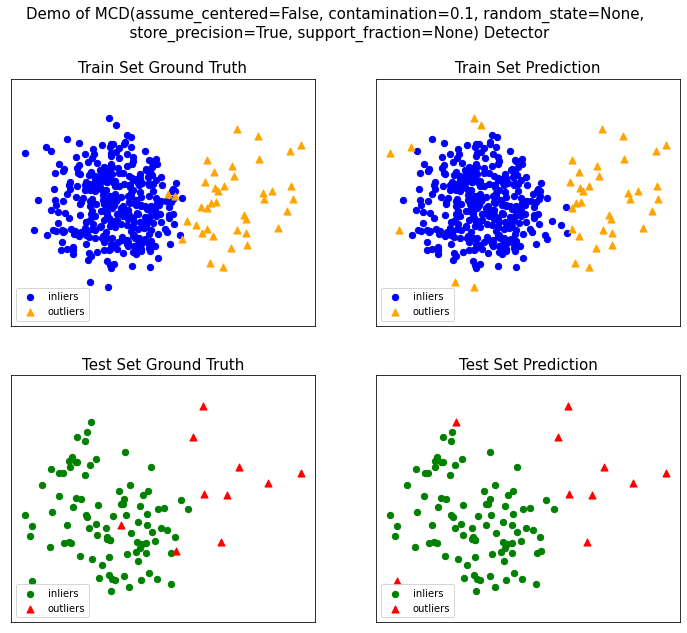

In [192]:
# (b)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

# Fit pca to X_train and X_test and transform 
train_principalComponents = pca.fit_transform(X_train)# YOUR CODE SHOULD COME HERE
test_principalComponents = pca.fit_transform(X_test)# YOUR CODE SHOULD COME HERE

from pyod.utils.example import visualize
# Visualize the ground truth outliers and predicted outliers using visualize()

# YOUR CODE SHOULD COME HERE
model = clf.fit(train_principalComponents)

y_train_pred = model.predict(train_principalComponents)
y_test_pred = model.predict(test_principalComponents)


visualize(clf, X_train=train_principalComponents, y_train=y_train, X_test=test_principalComponents, 
          y_test=y_test, y_train_pred=y_train_pred, y_test_pred=y_test_pred)

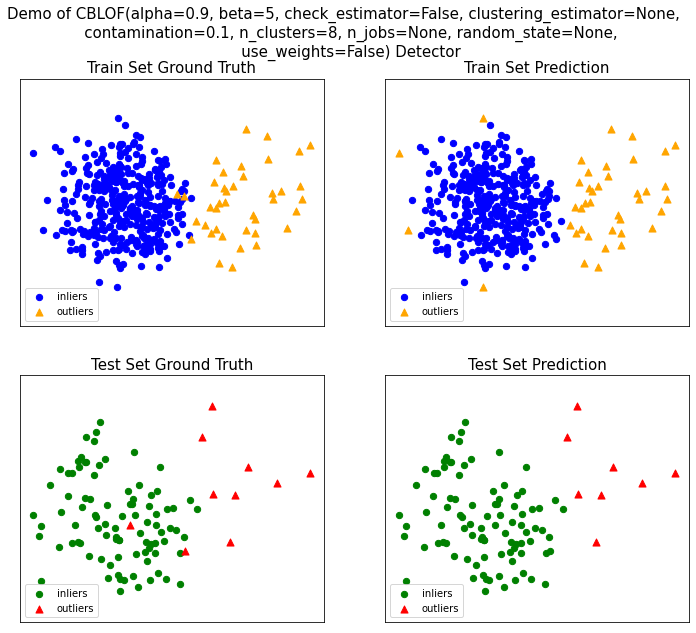

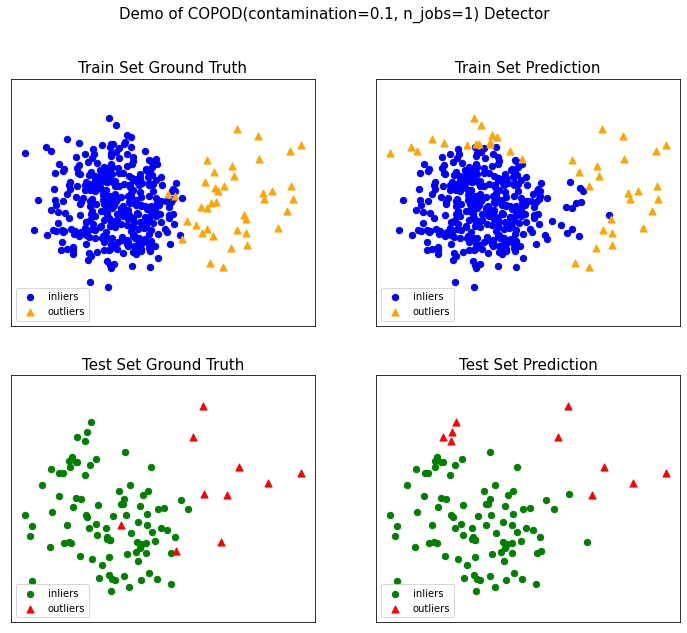

In [197]:
# (c)
from pyod.models.cblof import CBLOF
from pyod.models.copod import COPOD

# YOUR CODE SHOULD COME HERE


model_f = CBLOF()
model_f.fit(train_principalComponents)

y_train_pred = model_f.predict(train_principalComponents)
y_test_pred = model_f.predict(test_principalComponents)


visualize(model_f, X_train=train_principalComponents, y_train=y_train, X_test=test_principalComponents, 
          y_test=y_test, y_train_pred=y_train_pred, y_test_pred=y_test_pred)


model_d = COPOD()
model_d.fit(train_principalComponents)

y_train_pred = model_d.predict(train_principalComponents)
y_test_pred = model_d.predict(test_principalComponents)


visualize(model_d, X_train=train_principalComponents, y_train=y_train, X_test=test_principalComponents, 
          y_test=y_test, y_train_pred=y_train_pred, y_test_pred=y_test_pred)

# Question 4: PCA Conceptual questions (5 pts)
Explain the principle of Principal Component Analysis algorithm, especially why we can select the best projection bases based on the covariance matrix of data from the perspective of optimization?

# Answer:



# Question 5: Pre-processing and sampling (15 pts)

The following dataset contains House prices describing the sales of individual residential property in Ames, Iowa data with explanatory variables describing almost every aspect of residential homes and dependent variable being SalePrice. Here, some cells of most columns in the dataset contain NaN values.













In [177]:
import pandas as pd 
import numpy as np 
import scipy.stats as stats
import math
import matplotlib.pyplot as plt
np.random.seed(100)

data = pd.read_csv("sales_data.csv")
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SalePrice
0,60,RL,65.0,8450,NaN,7,5,2003,2003,196.0,...,0,0,0,NaN,NaN,NaN,0,2,2008,208500
1,20,RL,80.0,9600,NaN,6,8,1976,1976,0.0,...,0,0,0,NaN,NaN,NaN,0,5,2007,181500
2,60,RL,68.0,11250,NaN,7,5,2001,2002,162.0,...,0,0,0,NaN,NaN,NaN,0,9,2008,223500
3,70,RL,60.0,9550,NaN,7,5,1915,1970,0.0,...,0,0,0,NaN,NaN,NaN,0,2,2006,140000
4,60,RL,84.0,14260,NaN,8,5,2000,2000,350.0,...,0,0,0,NaN,NaN,NaN,0,12,2008,250000



a) **(2 pts)** Print the number of NaN values in each column.


In [178]:
x = data.isnull().sum()
print('Printing columns which have at least one NaN value. Columns with 0 NaNs are not printed.')
x[x>0]

Printing columns which have at least one NaN value. Columns with 0 NaNs are not printed.


LotFrontage     259
Alley          1369
MasVnrArea        8
Electrical        1
FireplaceQu     690
GarageType       81
GarageYrBlt      81
PoolQC         1453
Fence          1179
MiscFeature    1406
dtype: int64

b) **(3 pts)** Create a copy of `data`, and name it `data_dm`, then create a new column in `data_dm` named `binned_yr_built` and apply binning to the column `yr_built`. Use `pandas.cut()` and modify its paramter list as below:

```
bins=[1900, 1920, 1940, 1960, 1980, 2000, 2020]
labels=['1900-1920', '1920-1940', '1940-1960', '1960-1980', '1980-2000', '2000-2020']
include_lowest=True
```
Next, perform one-hot encoding on this new column.

In [179]:
data_dm = data.copy()
data_dm['binned_yr_built'] = pd.cut(data_dm['YearBuilt'], bins = [1900, 1920, 1940, 1960, 1980, 2000, 2020], 
                                    labels = ['1900-1920', '1920-1940', '1940-1960', '1960-1980', 
                                              '1980-2000', '2000-2020'],
                                    include_lowest = True)
one_hot = pd.get_dummies(data_dm['binned_yr_built'])
data_dm = data_dm.merge(one_hot, left_index=True, right_index = True)
data_dm

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,MoSold,YrSold,SalePrice,binned_yr_built,1900-1920,1920-1940,1940-1960,1960-1980,1980-2000,2000-2020
0,60,RL,65.0,8450,NaN,7,5,2003,2003,196.0,...,2,2008,208500,2000-2020,0,0,0,0,0,1
1,20,RL,80.0,9600,NaN,6,8,1976,1976,0.0,...,5,2007,181500,1960-1980,0,0,0,1,0,0
2,60,RL,68.0,11250,NaN,7,5,2001,2002,162.0,...,9,2008,223500,2000-2020,0,0,0,0,0,1
3,70,RL,60.0,9550,NaN,7,5,1915,1970,0.0,...,2,2006,140000,1900-1920,1,0,0,0,0,0
4,60,RL,84.0,14260,NaN,8,5,2000,2000,350.0,...,12,2008,250000,1980-2000,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,NaN,6,5,1999,2000,0.0,...,8,2007,175000,1980-2000,0,0,0,0,1,0
1456,20,RL,85.0,13175,NaN,6,6,1978,1988,119.0,...,2,2010,210000,1960-1980,0,0,0,1,0,0
1457,70,RL,66.0,9042,NaN,7,9,1941,2006,0.0,...,5,2010,266500,1940-1960,0,0,1,0,0,0
1458,20,RL,68.0,9717,NaN,5,6,1950,1996,0.0,...,4,2010,142125,1940-1960,0,0,1,0,0,0


c) **(2 pts)** Drop the columns which have more than 65 percentage of missing values.

In [180]:
# Getting columns which have more than 65% missing values
x2 = x[x>0] / data.shape[0]
drop_cols = x2[x2 > 0.65].index.to_list()
data_dm.drop(columns = drop_cols, inplace = True)


d) **(3 pts)** Take a sample of 800 rows at random and compute its mean, compare this value with the population mean.
  

In [181]:
np.random.seed(6)
sample_ages = np.random.choice(a= data['SalePrice'], size=800)
#Sample mean
print('Sample mean:', round(sample_ages.mean(),2))
#Population mean
print('Population mean:', round(data['SalePrice'].mean(),2))

Sample mean: 178292.63
Population mean: 180921.2


e) **(2pts)** Calculate the 95% confidence intervals for SalePrice with a sample size of 100. 

**(3pts)** Calculate the 95% confidence intervals for 100 different trials with a sample size of 500. Plot the confidence intervals and interpret how it captures the population mean.

In [182]:
np.random.seed(10)
sample_size = 100
sample = np.random.choice(a= data_dm['SalePrice'],
                          size = sample_size)
sample_mean = sample.mean()

#Get the critical Z value
# Dividing by 2 because two-tailed 
z_critical = stats.norm.ppf(0.05/2) * -1

#Get population standard deviation
pop_stdev = data_dm['SalePrice'].std()

#margin of error
margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size)) 

#confidence interval
confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

#Print confidence interval and true mean value
print('95% confidence interval:', confidence_interval)
print('Population mean:', round(data['SalePrice'].mean(),2))

95% confidence interval: (166522.08555078227, 197662.97444921773)
Population mean: 180921.2


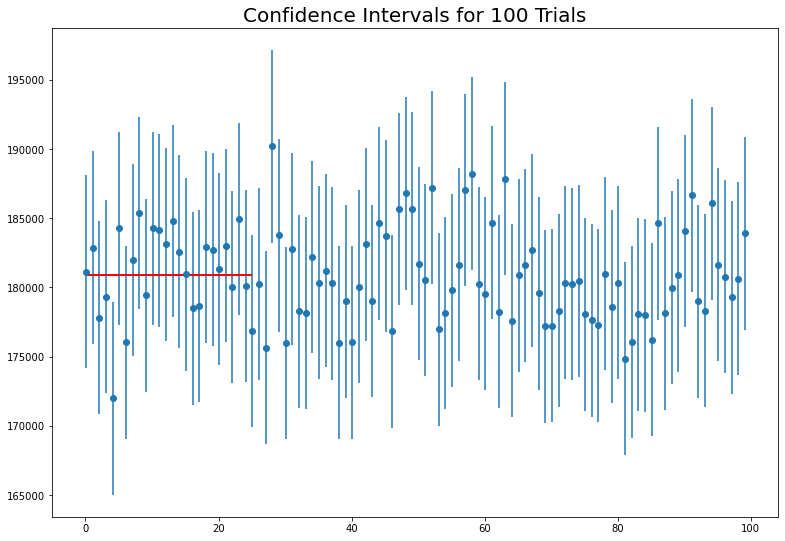

In [183]:
np.random.seed(12)

sample_size = 500

intervals = []
sample_means = []

for sample in range(100):
    sample = np.random.choice(a= data_dm['SalePrice'], size = sample_size)
    sample_mean = sample.mean()
    sample_means.append(sample_mean)
    # compute z critical value
    z_critical = stats.norm.ppf(0.05/2) * -1
    # compute population standard deviation     
    pop_stdev = data_dm['SalePrice'].std()
    margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))
    confidence_interval = (sample_mean - margin_of_error,
                           sample_mean + margin_of_error)  
    
    intervals.append(confidence_interval)
    
plt.figure(figsize=(13, 9))

plt.errorbar(x=np.arange(0.1, 100, 1), 
             y=sample_means, 
             yerr=[(top-bot)/2 for top,bot in intervals],
             fmt='o')

plt.hlines(xmin=0, xmax=25,
           y=data['SalePrice'].mean(), 
           linewidth=2.0,
           color="red")
plt.title('Confidence Intervals for 100 Trials', fontsize = 20)
plt.show()

The x% confidence interval is defined as the range over which we are x% confident that the true mean lies. For this case, we are 95% confident that the true mean lies in the range specified, and we can observe this from the graph.